In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# Load datasets
heart_attack_data = pd.read_csv('heart_attack_prediction_dataset.csv')
cvd_cleaned_data = pd.read_csv('CVD_cleaned.csv')


In [2]:
cvd_cleaned_data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [3]:
cvd_cleaned_data.groupby('Heart_Disease').describe().T

Heart_Disease                                  No           Yes
Height_(cm)                  count  283883.000000  24971.000000
                             mean      170.565367    171.182332
                             std        10.659193     10.628520
                             min        91.000000     91.000000
                             25%       163.000000    163.000000
                             50%       170.000000    173.000000
                             75%       178.000000    178.000000
                             max       241.000000    216.000000
Weight_(kg)                  count  283883.000000  24971.000000
                             mean       83.298262     86.889986
                             std        21.298574     21.571551
                             min        24.950000     30.000000
                             25%        68.040000     72.570000
                             50%        81.190000     83.910000
                             75%        95.250000     99.790000
                             max       293.020000    283.500000
BMI                          count  283883.000000  24971.000000
                             mean       28.543676     29.564505
                             std         6.511201      6.575148
                             min        12.020000     12.110000
                             25%        24.140000     25.090000
                             50%        27.440000     28.550000
                             75%        31.660000     32.890000
                             max        99.330000     88.570000
Alcohol_Consumption          count  283883.000000  24971.000000
                             mean        5.185298      4.085339
                             std         8.198700      8.143996
                             min         0.000000      0.000000
                             25%         0.000000      0.000000
                             50%         1.000000      0.000000
                             75%         7.000000      4.000000
                             max        30.000000     30.000000
Fruit_Consumption            count  283883.000000  24971.000000
                             mean       29.983159     28.153138
                             std        24.908340     24.439608
                             min         0.000000      0.000000
                             25%        12.000000     10.000000
                             50%        30.000000     30.000000
                             75%        30.000000     30.000000
                             max       120.000000    120.000000
Green_Vegetables_Consumption count  283883.000000  24971.000000
                             mean       15.216878     13.900404
                             std        15.003458     13.961847
                             min         0.000000      0.000000
                             25%         4.000000      4.000000
                             50%        12.000000     10.000000
                             75%        20.000000     20.000000
                             max       128.000000    124.000000
FriedPotato_Consumption      count  283883.000000  24971.000000
                             mean        6.320104      6.029594
                             std         8.589234      8.506845
                             min         0.000000      0.000000
                             25%         2.000000      1.000000
                             50%         4.000000      4.000000
                             75%         8.000000      8.000000
                             max       128.000000    120.000000

In [4]:
heart_attack_data.groupby('Heart Attack Risk').describe().T

Heart Attack Risk                    0            1
Age                 count  5624.000000  3139.000000
                    mean     53.606330    53.890092
                    std      21.192815    21.352881
                    min      18.000000    18.000000
                    25%      35.000000    35.000000
...                                ...          ...
Sleep Hours Per Day min       4.000000     4.000000
                    25%       5.000000     5.000000
                    50%       7.000000     7.000000
                    75%       9.000000     9.000000
                    max      10.000000    10.000000

[144 rows x 2 columns]

In [5]:
cvd_cleaned_data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

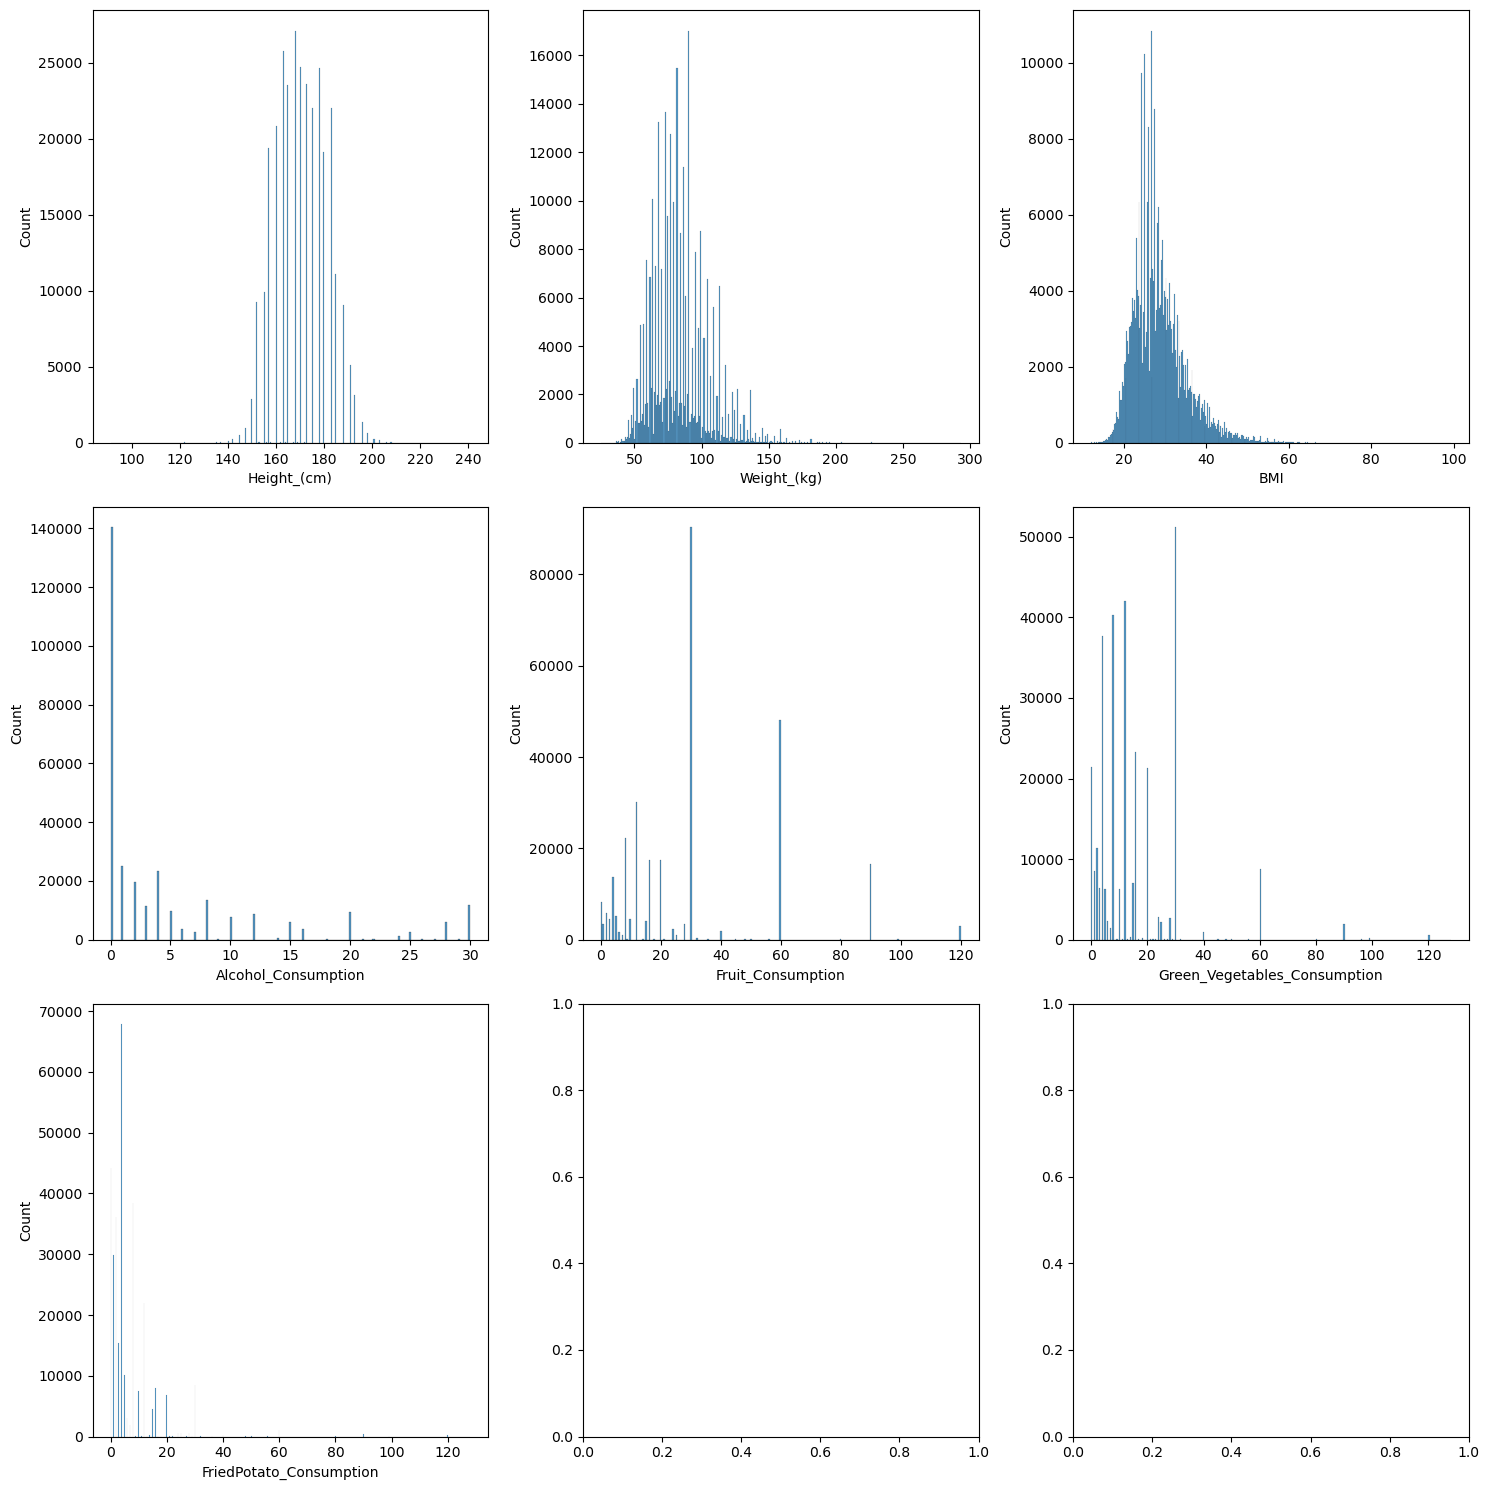

In [6]:
numerical_cols = ["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", 
                  "Fruit_Consumption",'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, col in enumerate(numerical_cols):
    row = i // 3
    col = i % 3
    sns.histplot(cvd_cleaned_data[numerical_cols[i]], ax=axs[row, col])

plt.tight_layout()
plt.show()

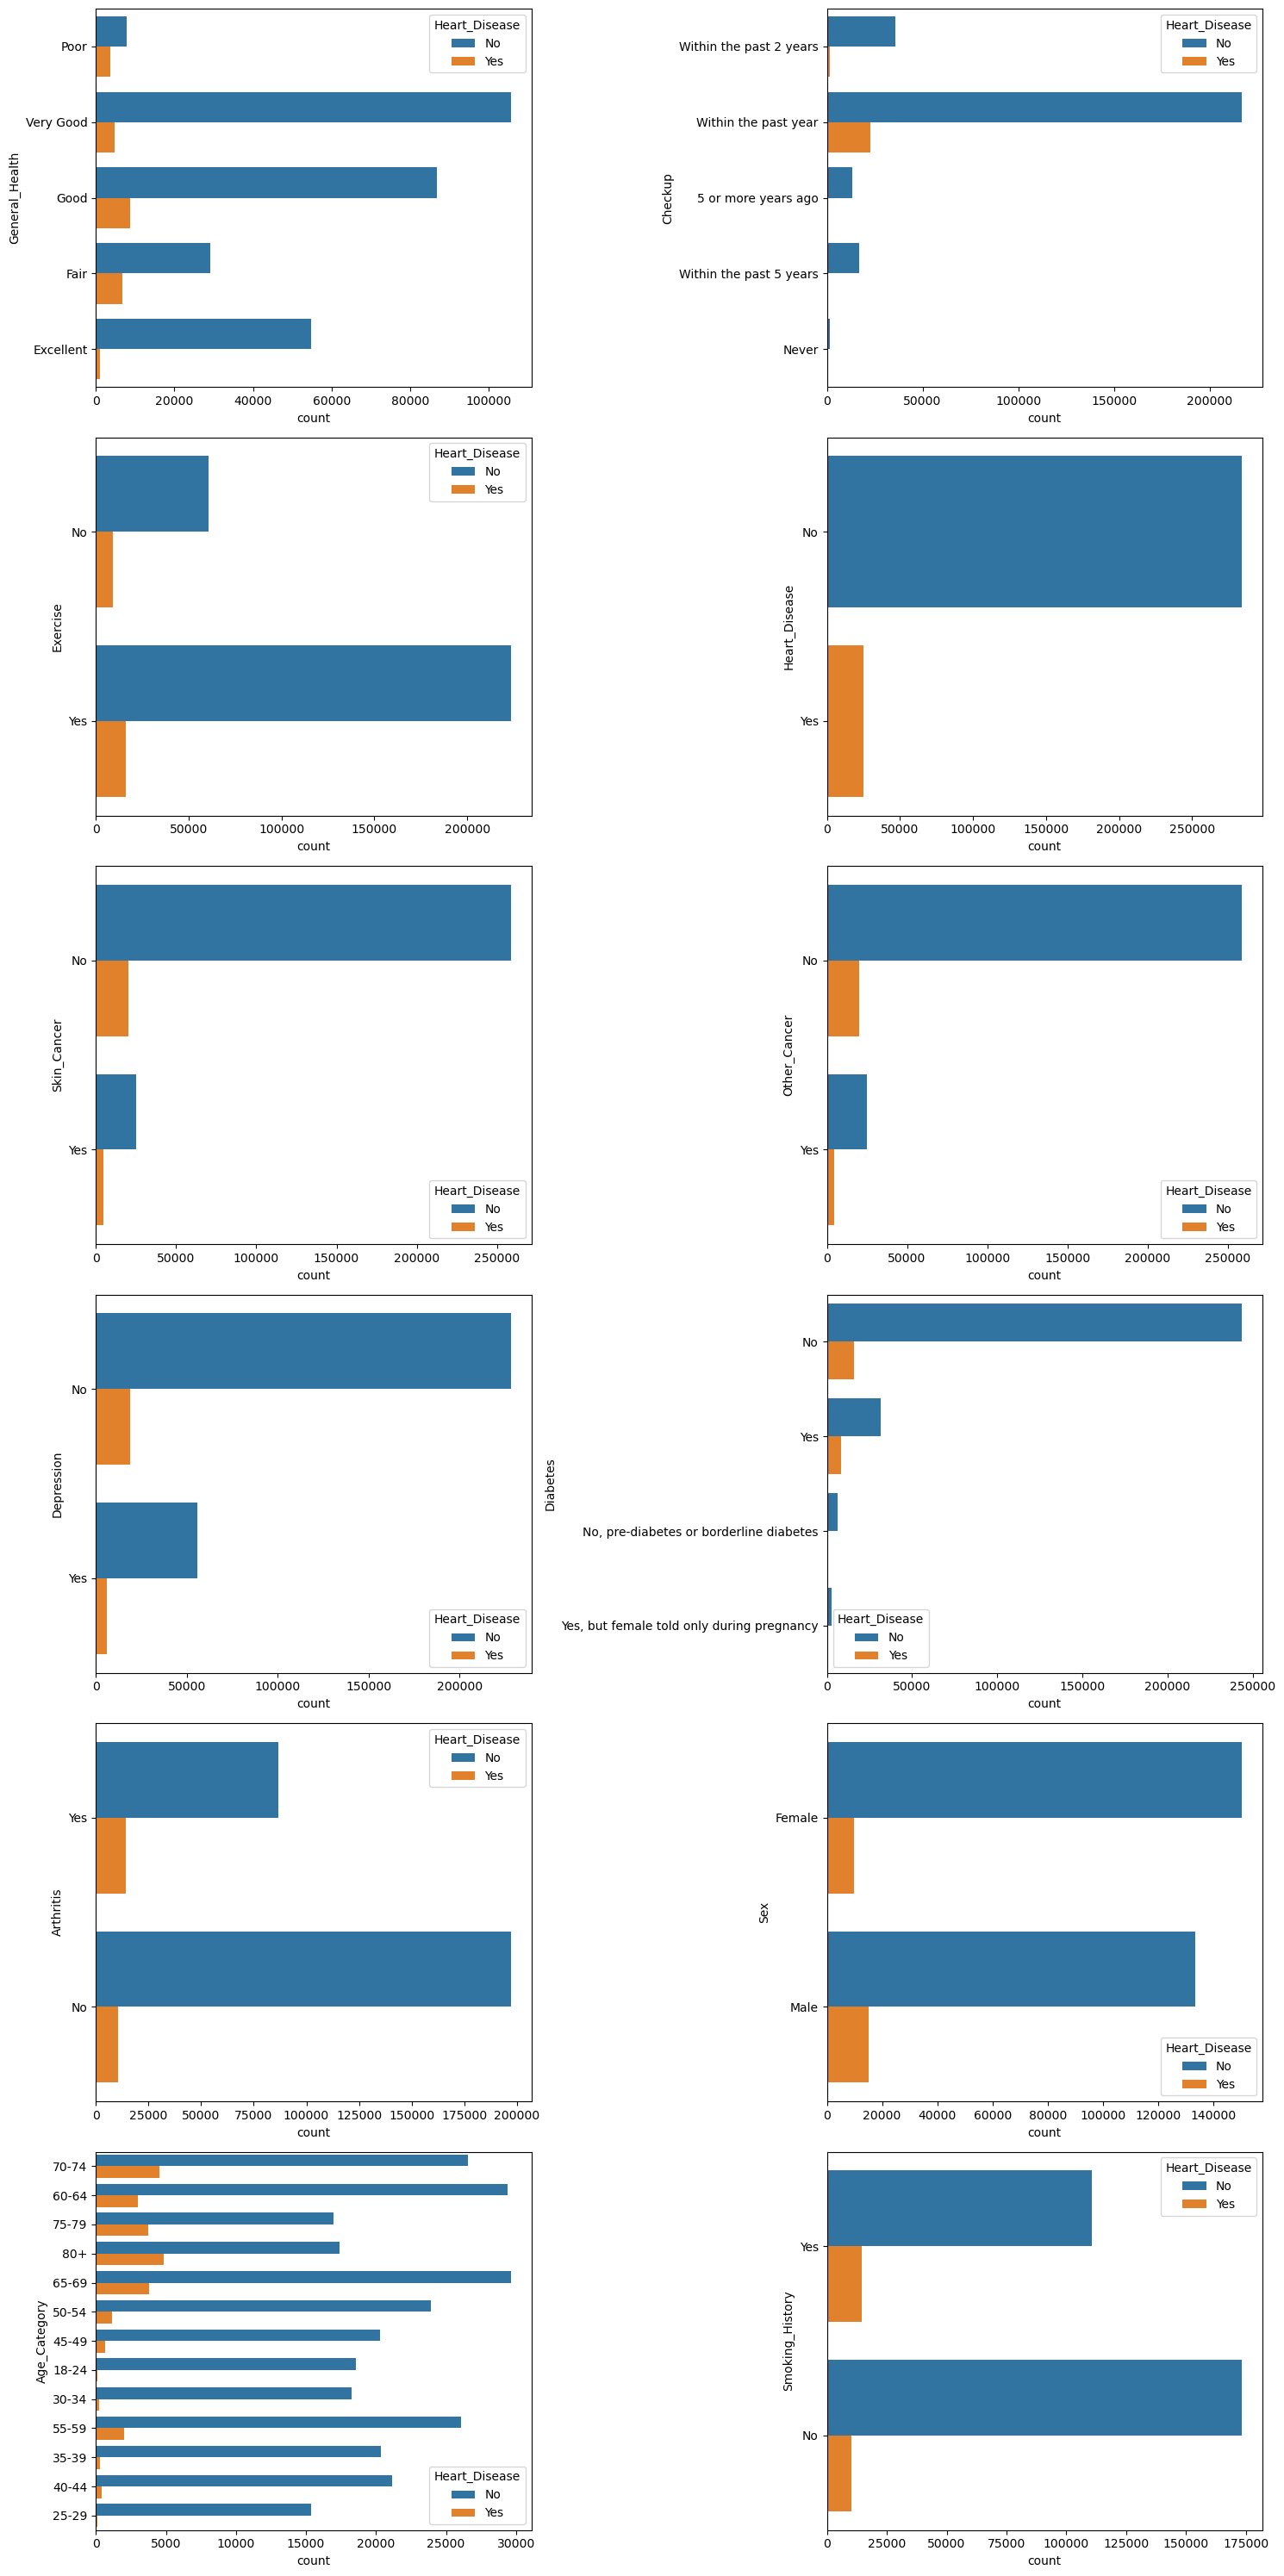

In [7]:
categorical_cols = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category','Smoking_History']

# Plotting the distribution of categorical variables
fig, axs = plt.subplots(6, 2, figsize=(15, 30))

for i, col in enumerate(categorical_cols):
    row = i // 2
    col = i % 2
    sns.countplot(y=cvd_cleaned_data[categorical_cols[i]],hue=cvd_cleaned_data['Heart_Disease'], ax=axs[row, col])

plt.tight_layout()
plt.show()

In [8]:
heart_attack_data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [9]:
def preprocess_heart_attack_data(df):
    # Standardize column names
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # Drop any duplicates
    df = df.drop_duplicates()

    # Split Blood Pressure into systolic and diastolic
    df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True).astype(float)
    df = df.drop(columns=['blood_pressure'])

    # Handle missing values
    df = df.fillna(df.median(numeric_only=True))

    # Encode 'sex' as 1 for Male and 0 for Female
    df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

    # Encode categorical columns (Country, Continent, Hemisphere)
    le = LabelEncoder()
    df['country'] = le.fit_transform(df['country'])
    df['continent'] = le.fit_transform(df['continent'])
    df['hemisphere'] = le.fit_transform(df['hemisphere'])
    df['diet'] = le.fit_transform(df['diet'])
    

    # Convert target variable to integer
    df['heart_attack_risk'] = df['heart_attack_risk'].astype(int)

    return df


In [10]:

def preprocess_cvd_cleaned_data(df):
    # Standardize column names
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # Drop duplicates
    df = df.drop_duplicates()

    # Handle missing values
    df = df.fillna(df.median(numeric_only=True))

    # Encode categorical variables
    categorical_cols = ['general_health', 'checkup', 'exercise', 'heart_disease', 'skin_cancer', 'other_cancer', 
                        'depression', 'diabetes', 'arthritis', 'sex', 'smoking_history', 'alcohol_consumption',]
    
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    return df

In [11]:




# Preprocess both datasets
heart_attack_data_clean = preprocess_heart_attack_data(heart_attack_data)
cvd_cleaned_data_clean = preprocess_cvd_cleaned_data(cvd_cleaned_data)


In [12]:
heart_attack_data_clean=heart_attack_data_clean.drop('patient_id', axis =1 )

In [13]:
heart_attack_data_clean

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic_bp,diastolic_bp
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,0,158.0,88.0
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,0,165.0,93.0
2,21,0,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,0,174.0,99.0
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,0,163.0,100.0
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,0,91.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,16,1,0,0,94.0,76.0
8759,28,0,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,3,4,0,0,157.0,102.0
8760,47,1,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,2,5,1,1,161.0,75.0
8761,36,1,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,2,5,1,0,119.0,67.0


In [14]:
cvd_cleaned_data_clean

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height_(cm),weight_(kg),bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,friedpotato_consumption
0,3,2,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,70-74,165.0,77.11,28.29,0,0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,60-64,163.0,88.45,33.47,0,4,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,75-79,180.0,93.44,28.73,0,0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,0,1,25-29,168.0,81.65,29.05,0,4,30.0,8.0,0.0
308850,1,3,1,0,0,0,0,2,0,1,65-69,180.0,69.85,21.48,0,8,15.0,60.0,4.0
308851,4,0,1,0,0,0,1,3,0,0,30-34,157.0,61.23,24.69,1,4,40.0,8.0,4.0
308852,4,4,1,0,0,0,0,0,0,1,65-69,183.0,79.38,23.73,0,3,30.0,12.0,0.0


In [15]:
heart_attack_data_clean

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic_bp,diastolic_bp
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,0,158.0,88.0
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,0,165.0,93.0
2,21,0,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,0,174.0,99.0
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,0,163.0,100.0
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,0,91.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,16,1,0,0,94.0,76.0
8759,28,0,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,3,4,0,0,157.0,102.0
8760,47,1,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,2,5,1,1,161.0,75.0
8761,36,1,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,2,5,1,0,119.0,67.0


In [16]:
import  matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns

def feature_engineering_heart_attack(df):
    # Create a new feature: cholesterol_to_bmi_ratio
    df['cholesterol_to_bmi_ratio'] = df['cholesterol'] / df['bmi']
    
    # Create a new feature: blood_pressure_diff
    df['blood_pressure_diff'] = df['systolic_bp'] - df['diastolic_bp']
    
    # Create binary features from numerical data
    df['high_cholesterol'] = (df['cholesterol'] > 240).astype(int)
    df['high_systolic_bp'] = (df['systolic_bp'] > 140).astype(int)
    df['high_diastolic_bp'] = (df['diastolic_bp'] > 90).astype(int)
    
    return df

def feature_engineering_cvd(df):
    # Create binary feature: obese from bmi
    df['obese'] = (df['bmi'] >= 30).astype(int)

    # Create new features related to consumption
    df['healthy_eating_ratio'] = df['fruit_consumption'] / (df['friedpotato_consumption'] + 1)

    return df

# --- Exploratory Data Analysis (EDA) ---

def eda(df):
    # Plot histograms for all numeric columns
    df.hist(bins=20, figsize=(20, 15))
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.show()

    # Box plots to detect outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df)
    plt.show()

# --- Feature Scaling ---

def scale_features(df, columns_to_scale):
    scaler = StandardScaler()
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    return df



# Feature engineering
heart_attack_data_clean = feature_engineering_heart_attack(heart_attack_data_clean)
cvd_cleaned_data_clean = feature_engineering_cvd(cvd_cleaned_data_clean)

# Scale numerical features for heart attack data
columns_to_scale_heart_attack = ['cholesterol', 'bmi', 'triglycerides', 'systolic_bp', 'diastolic_bp']
heart_attack_data_clean = scale_features(heart_attack_data_clean, columns_to_scale_heart_attack)

# Scale numerical features for CVD cleaned data
columns_to_scale_cvd = ['bmi', 'height_(cm)', 'weight_(kg)', 'fruit_consumption', 'green_vegetables_consumption', 'friedpotato_consumption']
cvd_cleaned_data_clean = scale_features(cvd_cleaned_data_clean, columns_to_scale_cvd)


In [17]:
heart_attack_data_clean

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,...,continent,hemisphere,heart_attack_risk,systolic_bp,diastolic_bp,cholesterol_to_bmi_ratio,blood_pressure_diff,high_cholesterol,high_systolic_bp,high_diastolic_bp
0,67,1,-0.641579,72,0,0,1,0,0,4.168189,...,5,1,0,0.870044,0.193782,6.655737,70.0,0,1,0
1,21,1,1.596895,98,1,1,1,1,1,1.813242,...,4,0,0,1.135714,0.534480,14.304114,72.0,1,1,1
2,21,0,0.793023,72,1,0,0,0,0,2.078353,...,3,0,0,1.477290,0.943319,11.498915,75.0,1,1,1
3,84,1,1.522691,73,1,1,1,0,1,9.828130,...,4,0,0,1.059809,1.011458,10.503307,63.0,1,1,1
4,66,1,0.718820,93,1,1,1,1,0,5.804299,...,1,0,0,-1.672797,0.193782,14.581040,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,-1.717530,61,1,1,1,0,1,7.917342,...,1,0,0,-1.558939,-0.623895,6.155914,18.0,0,0,0
8759,28,0,-1.729898,73,1,0,0,1,0,16.558426,...,4,0,0,0.832092,1.147738,5.001278,55.0,0,1,1
8760,47,1,-0.122154,105,0,1,1,1,1,3.148438,...,5,1,1,0.983903,-0.692035,7.060921,86.0,1,1,0
8761,36,1,-1.012597,60,1,0,1,0,0,3.789950,...,5,1,0,-0.610117,-1.237152,6.521575,52.0,0,0,0


In [18]:
cvd_cleaned_data_clean

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,...,height_(cm),weight_(kg),bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,friedpotato_consumption,obese,healthy_eating_ratio
0,3,2,0,0,0,0,0,0,1,0,...,-1.934170,-2.386099,-2.159627,1,0,0.006661,0.059656,0.664362,0,2.307692
1,4,4,0,1,0,0,0,2,0,0,...,-0.526833,-0.303608,-0.051636,0,0,0.006661,-1.012235,-0.267624,0,6.000000
2,4,4,1,0,0,0,0,2,0,0,...,-0.714478,0.227673,0.742501,0,4,-0.716876,-0.811255,1.130355,1,0.705882
3,3,4,1,1,0,0,0,2,0,1,...,0.880503,0.461456,0.015819,0,0,0.006661,0.997561,0.198369,0,3.333333
4,2,4,0,0,0,0,0,0,0,1,...,1.912549,0.227673,-0.652605,1,0,-0.877663,-0.744262,-0.733617,0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,0,1,...,-0.245366,-0.090908,0.064878,0,4,0.006661,-0.476289,-0.733617,0,30.000000
308850,1,3,1,0,0,0,0,2,0,1,...,0.880503,-0.643740,-1.095666,0,8,-0.596287,3.007357,-0.267624,0,3.000000
308851,4,0,1,0,0,0,1,3,0,0,...,-1.277413,-1.047589,-0.603547,1,4,0.408626,-0.476289,-0.267624,0,8.000000
308852,4,4,1,0,0,0,0,0,0,1,...,1.161970,-0.197258,-0.750723,0,3,0.006661,-0.208317,-0.733617,0,30.000000


In [32]:
def map_age_category_to_average(df, column):
    age_map = {
        '18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, 
        '40-44': 42, '45-49': 47, '50-54': 52, '55-59': 57,
        '60-64': 62, '65-69': 67, '70-74': 72, '75-79': 77, 
        '80+': 85  # Approximation for 80 and above
    }
    df[column] = df[column].map(age_map)
    return df


In [33]:
def map_age_category_to_average(df, column):
    age_map = {
        '18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, 
        '40-44': 42, '45-49': 47, '50-54': 52, '55-59': 57,
        '60-64': 62, '65-69': 67, '70-74': 72, '75-79': 77, 
        '80+': 85  # Approximation for 80 and above
    }
    df[column] = df[column].map(age_map)
    return df


In [42]:
cvd_cleaned_data

,general_health,checkup,exercise,heart_disease,skin_cancer,other_cancer,depression,diabetes,arthritis,sex,age_category,height_(cm),weight_(kg),bmi,smoking_history,alcohol_consumption,fruit_consumption,green_vegetables_consumption,friedpotato_consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [43]:
# Apply this function to the dataset
cvd_cleaned_data = map_age_category_to_average(cvd_cleaned_data, 'age_category')

# Preprocess the rest of the data as before
cvd_cleaned_data_clean = preprocess_cvd_cleaned_data(cvd_cleaned_data)


In [44]:
# Split heart attack data into train/test sets
X_heart_attack = heart_attack_data_clean.drop(columns=['heart_attack_risk'])
y_heart_attack = heart_attack_data_clean['heart_attack_risk']
X_train_heart_attack, X_test_heart_attack, y_train_heart_attack, y_test_heart_attack = train_test_split(X_heart_attack, y_heart_attack, test_size=0.3, random_state=42)

# Split CVD cleaned data into train/test sets
X_cvd = cvd_cleaned_data_clean.drop(columns=['heart_disease'])
y_cvd = cvd_cleaned_data_clean['heart_disease']
X_train_cvd, X_test_cvd, y_train_cvd, y_test_cvd = train_test_split(X_cvd, y_cvd, test_size=0.3, random_state=42)


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:

# --- Machine Learning Models ---
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1}


In [47]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
logreg_model = LogisticRegression(random_state=42)
nn_model = MLPClassifier(random_state=42)

# Train models on heart attack data
rf_model.fit(X_train_heart_attack, y_train_heart_attack)
svm_model.fit(X_train_heart_attack, y_train_heart_attack)
logreg_model.fit(X_train_heart_attack, y_train_heart_attack)
nn_model.fit(X_train_heart_attack, y_train_heart_attack)

# Evaluate models on heart attack data
rf_eval_heart_attack = evaluate_model(rf_model, X_test_heart_attack, y_test_heart_attack)
svm_eval_heart_attack = evaluate_model(svm_model, X_test_heart_attack, y_test_heart_attack)
logreg_eval_heart_attack = evaluate_model(logreg_model, X_test_heart_attack, y_test_heart_attack)
nn_eval_heart_attack = evaluate_model(nn_model, X_test_heart_attack, y_test_heart_attack)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:


print("Random Forest (Heart Attack):", rf_eval_heart_attack)
print("SVM (Heart Attack):", svm_eval_heart_attack)
print("Logistic Regression (Heart Attack):", logreg_eval_heart_attack)
print("Neural Network (Heart Attack):", nn_eval_heart_attack)


Random Forest (Heart Attack): {'accuracy': 0.6325599087105364, 'precision': 0.2878787878787879, 'recall': 0.02025586353944563, 'f1_score': 0.037848605577689244}
SVM (Heart Attack): {'accuracy': 0.6432103461392165, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
Logistic Regression (Heart Attack): {'accuracy': 0.6432103461392165, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
Neural Network (Heart Attack): {'accuracy': 0.6432103461392165, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}


In [50]:

# Train models on CVD cleaned data
rf_model.fit(X_train_cvd, y_train_cvd)
svm_model.fit(X_train_cvd, y_train_cvd)
logreg_model.fit(X_train_cvd, y_train_cvd)
nn_model.fit(X_train_cvd, y_train_cvd)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier(random_state=42)

In [51]:

# Evaluate models on CVD cleaned data
rf_eval_cvd = evaluate_model(rf_model, X_test_cvd, y_test_cvd)
svm_eval_cvd = evaluate_model(svm_model, X_test_cvd, y_test_cvd)
logreg_eval_cvd = evaluate_model(logreg_model, X_test_cvd, y_test_cvd)
nn_eval_cvd = evaluate_model(nn_model, X_test_cvd, y_test_cvd)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:

print("Random Forest (CVD):", rf_eval_cvd)
print("SVM (CVD):", svm_eval_cvd)
print("Logistic Regression (CVD):", logreg_eval_cvd)
print("Neural Network (CVD):", nn_eval_cvd)


Random Forest (CVD): {'accuracy': 0.9186574978679304, 'precision': 0.4975728155339806, 'recall': 0.027213593521837248, 'f1_score': 0.05160478288231592}
SVM (CVD): {'accuracy': 0.9186790884458023, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0}
Logistic Regression (CVD): {'accuracy': 0.9178694417756091, 'precision': 0.43409490333919154, 'recall': 0.03278906146289659, 'f1_score': 0.060972599358183166}
Neural Network (CVD): {'accuracy': 0.91871147431261, 'precision': 0.5789473684210527, 'recall': 0.0014602416036107793, 'f1_score': 0.002913135593220339}


Selected Features (Heart Attack): Index(['exercise_hours_per_week', 'sedentary_hours_per_day', 'income', 'bmi',
       'cholesterol_to_bmi_ratio'],
      dtype='object')
Selected Features (CVD): Index(['weight_(kg)', 'bmi', 'fruit_consumption',
       'green_vegetables_consumption', 'friedpotato_consumption'],
      dtype='object')


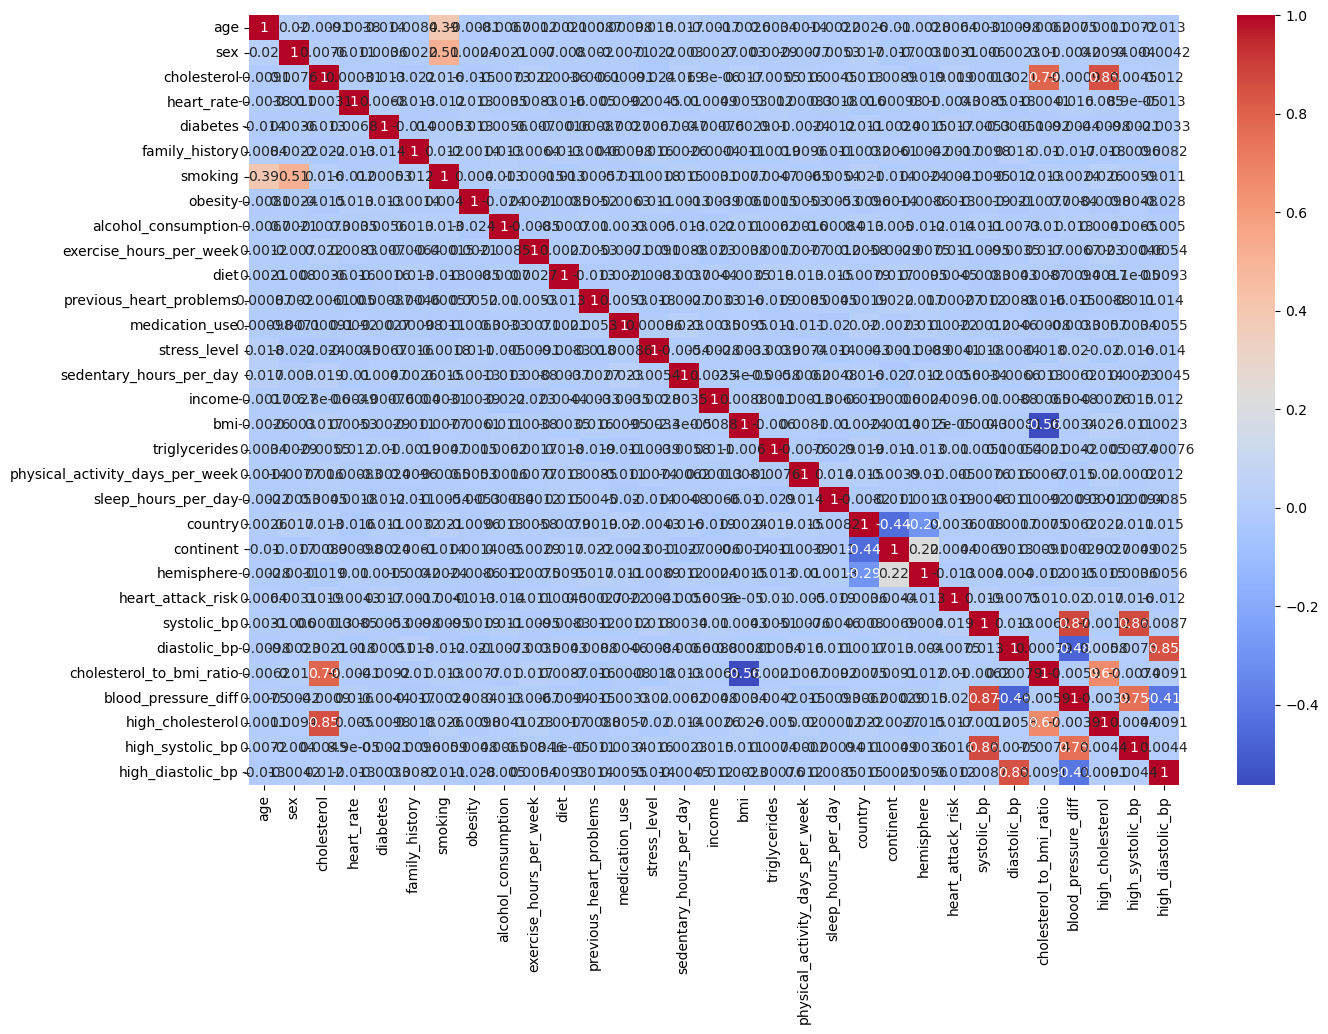

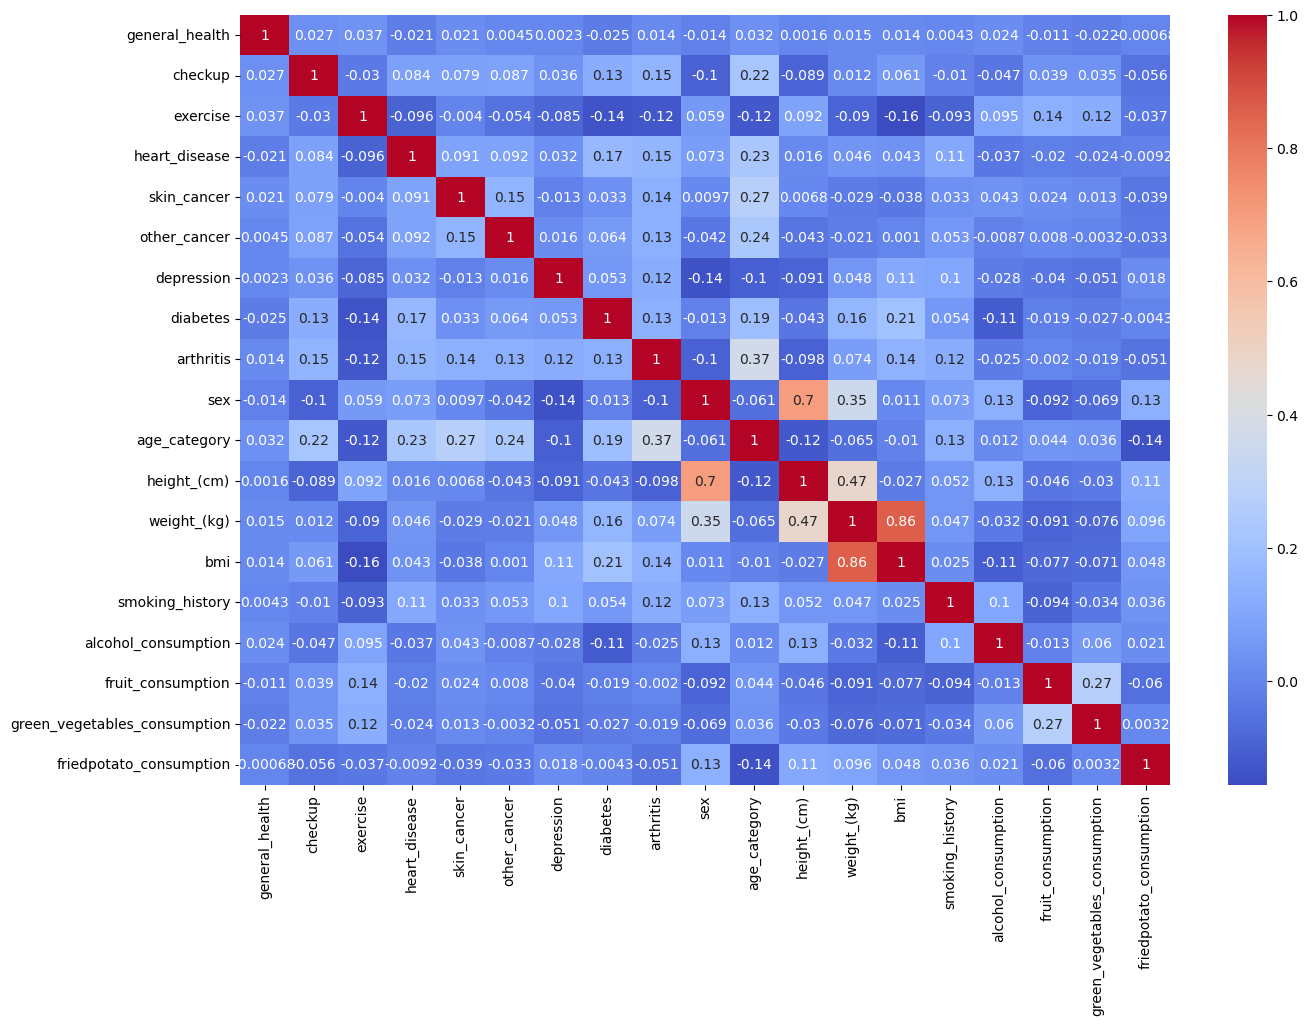

In [53]:

# --- Feature Importance using RFE ---
def perform_rfe(model, X_train, y_train, n_features):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]
    return selected_features

# Feature importance using RFE on heart attack data (Random Forest)
selected_features_heart_attack = perform_rfe(rf_model, X_train_heart_attack, y_train_heart_attack, 5)
print("Selected Features (Heart Attack):", selected_features_heart_attack)

# Feature importance using RFE on CVD data (Random Forest)
selected_features_cvd = perform_rfe(rf_model, X_train_cvd, y_train_cvd, 5)
print("Selected Features (CVD):", selected_features_cvd)

# --- Correlation Heatmap ---
plt.figure(figsize=(15, 10))
sns.heatmap(heart_attack_data_clean.corr(), annot=True, cmap='coolwarm')
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(cvd_cleaned_data_clean.corr(), annot=True, cmap='coolwarm')
plt.show()